C:\Anaconda\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


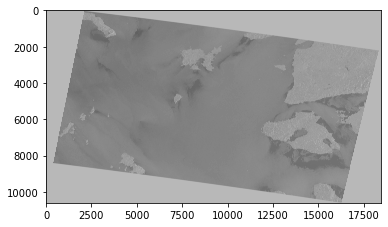

In [1]:
import matplotlib
from main.FolderInfos import FolderInfos
# matplotlib.use('Agg')
FolderInfos.init(test_without_data=True)

import matplotlib.pyplot as plt
import os
import json
from main.test.test_images import Test_images

folder = FolderInfos.data_test+"outputs"+FolderInfos.separator+"Patch_creator1"+FolderInfos.separator
if os.path.exists(folder) is False:
    os.mkdir(folder)
with open(FolderInfos.data_test+"images_informations_preprocessed.json") as fp: # Load informations about the files
    dico_infos = json.load(fp)

images_test = Test_images() # Get the object allowing to wuickly get the test images
array,transform = images_test.get_rasters(selector=0) # get the first test image
plt.imshow(array,cmap="gray") #

In [2]:
from PIL import Image, ImageDraw
import numpy as np
from main.src.data.patch_creator.patch_creator1 import Patch_creator1
for grid_size in [500,1000,1500]: # For different grid size we will test creating patches
    patch_creator = Patch_creator1(grid_size_px=grid_size,test=True,images_informations_preprocessed=dico_infos) # Create the path generator object

    img_transf = patch_creator.transform_back(array[:-1,:].astype(np.float32),name=images_test.current_name)
    plt.figure()
    plt.imshow(img_transf-np.min(img_transf),cmap="gray") #


    # Convert the raster array to a 0-255 array
    image_rgb_uint8 = np.stack((array,)*3,axis=-1)
    image_rgb_uint8 = (image_rgb_uint8 - np.min(image_rgb_uint8)) / (np.max(image_rgb_uint8) - np.min(image_rgb_uint8))*255 # Normalisation
    image_rgb_uint8 = image_rgb_uint8.astype(np.uint8)# Convert to uint8 array
    image_cpy = Image.fromarray(image_rgb_uint8) # Convert to pillow object
    image_cpy1 = Image.fromarray(np.copy(image_rgb_uint8)) # Prepare the image to draw on
    draw = ImageDraw.ImageDraw(image_cpy)
    for coords in patch_creator.coords:
        draw.rectangle(coords, width=30, outline="red")  # Draw the patches

    plt.figure()  # Create new separated figure
    image_annotated = Image.blend(image_cpy, image_cpy1, 0.5)  # Mix the original image with the annotated one
    plt.imshow(image_annotated)  # Show it
    plt.title(f"Patches of {grid_size} px length on {images_test.current_name}")

[[ 1.79663057e-04 -0.00000000e+00  2.37071963e+01]
 [-0.00000000e+00 -1.79663057e-04  4.03863727e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


KeyboardInterrupt: 